### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("sources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()


APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

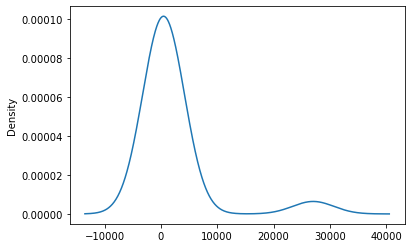

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than 10?
replace_application = list(application_counts[application_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

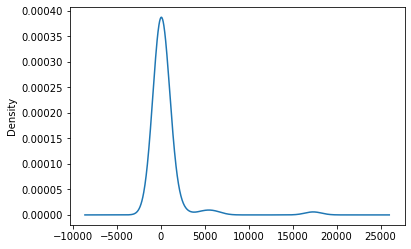

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/dilinigeerduolikun/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/Users/dilinigeerduolikun/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=180
hidden_nodes_layer2=50
hidden_nodes_layer3=10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=180, activation="relu", input_dim = number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='sigmoid'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 180)               9180      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                9050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 18,751
Trainable params: 18,751
Non-trainable params: 0
_________________________________________________________________


2022-10-30 19:05:52.075060: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-30 19:05:52.075524: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
import os 
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Create a callback that saves the model's weights every epoch
batch_size=100
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq= int(batch_size*13))

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Train on 25724 samples
Epoch 1/100
 1280/25724 [>.............................] - ETA: 13s - loss: 7.9776 - accuracy: 0.4828
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2144/25724 [=>............................] - ETA: 9s - loss: 8.1010 - accuracy: 0.4748 
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3456/25724 [===>..........................] - ETA: 6s - loss: 8.1900 - accuracy: 0.4690
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 4832/25724 [====>.........................] - ETA: 4s - loss: 8.2200 - accuracy: 0.4671
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6464/25724 [======>.......................] - ETA: 4s - loss: 8.1993 - accuracy: 0.4684
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 7712/25724 [=======>......................] - ETA: 3s - loss: 8.2345 - accuracy: 0.4662
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 8864/25724 [=========>....................] - ETA: 3s - loss: 8.2154 - accuracy: 0.467

20256/25724 [======================>.......] - ETA: 0s - loss: 8.2036 - accuracy: 0.4682
Epoch 00003: saving model to checkpoints/weights.03.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 8.2087 - accuracy: 0.4678
Epoch 00003: saving model to checkpoints/weights.03.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 8.2311 - accuracy: 0.4664
Epoch 00003: saving model to checkpoints/weights.03.hdf5
24608/25724 [===========================>..] - ETA: 0s - loss: 8.2139 - accuracy: 0.4675
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25724/25724 [==============================] - 3s 109us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 4/100
   32/25724 [..............................] - ETA: 3s - loss: 7.2304 - accuracy: 0.5312
Epoch 00004: saving model to checkpoints/weights.04.hdf5
 1376/25724 [>.............................] - ETA: 2s - loss: 8.3178 - accuracy: 0.4608
Epoch 00004: saving model to checkpoints/weights.04.hdf5
 2784/25724 [==

14112/25724 [===============>..............] - ETA: 1s - loss: 8.1584 - accuracy: 0.4711
Epoch 00006: saving model to checkpoints/weights.06.hdf5
15552/25724 [=================>............] - ETA: 1s - loss: 8.1509 - accuracy: 0.4716
Epoch 00006: saving model to checkpoints/weights.06.hdf5
16512/25724 [==================>...........] - ETA: 1s - loss: 8.1543 - accuracy: 0.4714
Epoch 00006: saving model to checkpoints/weights.06.hdf5
18016/25724 [====================>.........] - ETA: 0s - loss: 8.1500 - accuracy: 0.4716
Epoch 00006: saving model to checkpoints/weights.06.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 8.1604 - accuracy: 0.4710
Epoch 00006: saving model to checkpoints/weights.06.hdf5
20416/25724 [======================>.......] - ETA: 0s - loss: 8.1628 - accuracy: 0.4708
Epoch 00006: saving model to checkpoints/weights.06.hdf5
21920/25724 [========================>.....] - ETA: 0s - loss: 8.1664 - accuracy: 0.4706
Epoch 00006: saving model to checkp

 8000/25724 [========>.....................] - ETA: 1s - loss: 8.2157 - accuracy: 0.4674
Epoch 00009: saving model to checkpoints/weights.09.hdf5
 8992/25724 [=========>....................] - ETA: 1s - loss: 8.2271 - accuracy: 0.4666
Epoch 00009: saving model to checkpoints/weights.09.hdf5
10208/25724 [==========>...................] - ETA: 1s - loss: 8.2368 - accuracy: 0.4660
Epoch 00009: saving model to checkpoints/weights.09.hdf5
11648/25724 [============>.................] - ETA: 1s - loss: 8.2223 - accuracy: 0.4669
Epoch 00009: saving model to checkpoints/weights.09.hdf5
13024/25724 [==============>...............] - ETA: 1s - loss: 8.2360 - accuracy: 0.4661
Epoch 00009: saving model to checkpoints/weights.09.hdf5
14272/25724 [===============>..............] - ETA: 1s - loss: 8.2658 - accuracy: 0.4641
Epoch 00009: saving model to checkpoints/weights.09.hdf5
15680/25724 [=================>............] - ETA: 1s - loss: 8.2417 - accuracy: 0.4657
Epoch 00009: saving model to checkp

 1408/25724 [>.............................] - ETA: 2s - loss: 8.2602 - accuracy: 0.4645
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 2880/25724 [==>...........................] - ETA: 2s - loss: 8.3712 - accuracy: 0.4573
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 4288/25724 [====>.........................] - ETA: 2s - loss: 8.3492 - accuracy: 0.4587
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 5184/25724 [=====>........................] - ETA: 2s - loss: 8.4236 - accuracy: 0.4539
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 6592/25724 [======>.......................] - ETA: 2s - loss: 8.3536 - accuracy: 0.4584
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 7968/25724 [========>.....................] - ETA: 1s - loss: 8.3378 - accuracy: 0.4595
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9280/25724 [=========>....................] - ETA: 1s - loss: 8.2942 - accuracy: 0.4623
Epoch 00012: saving model to checkp

22368/25724 [=========================>....] - ETA: 0s - loss: 8.2248 - accuracy: 0.4668
Epoch 00014: saving model to checkpoints/weights.14.hdf5
23328/25724 [==========================>...] - ETA: 0s - loss: 8.2236 - accuracy: 0.4669
Epoch 00014: saving model to checkpoints/weights.14.hdf5
24768/25724 [===========================>..] - ETA: 0s - loss: 8.2063 - accuracy: 0.4680
Epoch 00014: saving model to checkpoints/weights.14.hdf5
25724/25724 [==============================] - 3s 109us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 15/100
  512/25724 [..............................] - ETA: 2s - loss: 8.4054 - accuracy: 0.4551
Epoch 00015: saving model to checkpoints/weights.15.hdf5
 1888/25724 [=>............................] - ETA: 2s - loss: 7.9739 - accuracy: 0.4831
Epoch 00015: saving model to checkpoints/weights.15.hdf5
 2816/25724 [==>...........................] - ETA: 2s - loss: 8.0028 - accuracy: 0.4812
Epoch 00015: saving model to checkpoints/weights.15.hdf5
 4288/25724 [=

15776/25724 [=================>............] - ETA: 1s - loss: 8.2385 - accuracy: 0.4659
Epoch 00017: saving model to checkpoints/weights.17.hdf5
17216/25724 [===================>..........] - ETA: 0s - loss: 8.1864 - accuracy: 0.4693
Epoch 00017: saving model to checkpoints/weights.17.hdf5
18624/25724 [====================>.........] - ETA: 0s - loss: 8.2069 - accuracy: 0.4679
Epoch 00017: saving model to checkpoints/weights.17.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 8.1969 - accuracy: 0.4686
Epoch 00017: saving model to checkpoints/weights.17.hdf5
21056/25724 [=======================>......] - ETA: 0s - loss: 8.1857 - accuracy: 0.4693
Epoch 00017: saving model to checkpoints/weights.17.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 8.2055 - accuracy: 0.4680
Epoch 00017: saving model to checkpoints/weights.17.hdf5
23488/25724 [==========================>...] - ETA: 0s - loss: 8.2057 - accuracy: 0.4680
Epoch 00017: saving model to checkp

 9280/25724 [=========>....................] - ETA: 1s - loss: 8.1679 - accuracy: 0.4705
Epoch 00020: saving model to checkpoints/weights.20.hdf5
10752/25724 [===========>..................] - ETA: 1s - loss: 8.2189 - accuracy: 0.4672
Epoch 00020: saving model to checkpoints/weights.20.hdf5
12160/25724 [=============>................] - ETA: 1s - loss: 8.1958 - accuracy: 0.4687
Epoch 00020: saving model to checkpoints/weights.20.hdf5
13632/25724 [==============>...............] - ETA: 1s - loss: 8.1843 - accuracy: 0.4694
Epoch 00020: saving model to checkpoints/weights.20.hdf5
14560/25724 [===============>..............] - ETA: 1s - loss: 8.1786 - accuracy: 0.4698
Epoch 00020: saving model to checkpoints/weights.20.hdf5
16032/25724 [=================>............] - ETA: 1s - loss: 8.2032 - accuracy: 0.4682
Epoch 00020: saving model to checkpoints/weights.20.hdf5
17504/25724 [===================>..........] - ETA: 0s - loss: 8.2139 - accuracy: 0.4675
Epoch 00020: saving model to checkp

 2912/25724 [==>...........................] - ETA: 2s - loss: 8.0833 - accuracy: 0.4760
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 4320/25724 [====>.........................] - ETA: 2s - loss: 8.0231 - accuracy: 0.4799
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 5760/25724 [=====>........................] - ETA: 2s - loss: 8.1490 - accuracy: 0.4717
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 7168/25724 [=======>......................] - ETA: 2s - loss: 8.1429 - accuracy: 0.4721
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 8128/25724 [========>.....................] - ETA: 1s - loss: 8.1774 - accuracy: 0.4699
Epoch 00023: saving model to checkpoints/weights.23.hdf5
 9664/25724 [==========>...................] - ETA: 1s - loss: 8.1929 - accuracy: 0.4689
Epoch 00023: saving model to checkpoints/weights.23.hdf5
11040/25724 [===========>..................] - ETA: 1s - loss: 8.2504 - accuracy: 0.4651
Epoch 00023: saving model to checkp

23616/25724 [==========================>...] - ETA: 0s - loss: 8.1684 - accuracy: 0.4704
Epoch 00025: saving model to checkpoints/weights.25.hdf5
25120/25724 [============================>.] - ETA: 0s - loss: 8.1865 - accuracy: 0.4693
Epoch 00025: saving model to checkpoints/weights.25.hdf5
25724/25724 [==============================] - 3s 110us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 26/100
  544/25724 [..............................] - ETA: 2s - loss: 7.9960 - accuracy: 0.4816
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 1984/25724 [=>............................] - ETA: 2s - loss: 7.9535 - accuracy: 0.4844
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 3264/25724 [==>...........................] - ETA: 2s - loss: 8.0716 - accuracy: 0.4767
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 4704/25724 [====>.........................] - ETA: 2s - loss: 8.0273 - accuracy: 0.4796
Epoch 00026: saving model to checkpoints/weights.26.hdf5
 6176/25724 [=

17728/25724 [===================>..........] - ETA: 1s - loss: 8.2406 - accuracy: 0.4658
Epoch 00028: saving model to checkpoints/weights.28.hdf5
18592/25724 [====================>.........] - ETA: 0s - loss: 8.2285 - accuracy: 0.4665
Epoch 00028: saving model to checkpoints/weights.28.hdf5
20032/25724 [======================>.......] - ETA: 0s - loss: 8.2407 - accuracy: 0.4658
Epoch 00028: saving model to checkpoints/weights.28.hdf5
21440/25724 [========================>.....] - ETA: 0s - loss: 8.2312 - accuracy: 0.4664
Epoch 00028: saving model to checkpoints/weights.28.hdf5
22688/25724 [=========================>....] - ETA: 0s - loss: 8.2339 - accuracy: 0.4662
Epoch 00028: saving model to checkpoints/weights.28.hdf5
23968/25724 [==========================>...] - ETA: 0s - loss: 8.2254 - accuracy: 0.4667
Epoch 00028: saving model to checkpoints/weights.28.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 8.2165 - accuracy: 0.4673
Epoch 00028: saving model to checkp

11104/25724 [===========>..................] - ETA: 1s - loss: 8.2806 - accuracy: 0.4632
Epoch 00031: saving model to checkpoints/weights.31.hdf5
12480/25724 [=============>................] - ETA: 1s - loss: 8.2526 - accuracy: 0.4650
Epoch 00031: saving model to checkpoints/weights.31.hdf5
13792/25724 [===============>..............] - ETA: 1s - loss: 8.2706 - accuracy: 0.4638
Epoch 00031: saving model to checkpoints/weights.31.hdf5
15104/25724 [================>.............] - ETA: 1s - loss: 8.2772 - accuracy: 0.4634
Epoch 00031: saving model to checkpoints/weights.31.hdf5
16512/25724 [==================>...........] - ETA: 1s - loss: 8.2720 - accuracy: 0.4637
Epoch 00031: saving model to checkpoints/weights.31.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 8.2656 - accuracy: 0.4641
Epoch 00031: saving model to checkpoints/weights.31.hdf5
19040/25724 [=====================>........] - ETA: 0s - loss: 8.2561 - accuracy: 0.4648
Epoch 00031: saving model to checkp

 4704/25724 [====>.........................] - ETA: 2s - loss: 8.1486 - accuracy: 0.4717
Epoch 00034: saving model to checkpoints/weights.34.hdf5
 5952/25724 [=====>........................] - ETA: 2s - loss: 8.1893 - accuracy: 0.4691
Epoch 00034: saving model to checkpoints/weights.34.hdf5
 7328/25724 [=======>......................] - ETA: 2s - loss: 8.2071 - accuracy: 0.4679
Epoch 00034: saving model to checkpoints/weights.34.hdf5
 8704/25724 [=========>....................] - ETA: 1s - loss: 8.2282 - accuracy: 0.4666
Epoch 00034: saving model to checkpoints/weights.34.hdf5
10112/25724 [==========>...................] - ETA: 1s - loss: 8.1564 - accuracy: 0.4712
Epoch 00034: saving model to checkpoints/weights.34.hdf5
11456/25724 [============>.................] - ETA: 1s - loss: 8.1689 - accuracy: 0.4704
Epoch 00034: saving model to checkpoints/weights.34.hdf5
12928/25724 [==============>...............] - ETA: 1s - loss: 8.1575 - accuracy: 0.4711
Epoch 00034: saving model to checkp

25724/25724 [==============================] - 3s 125us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 37/100
   32/25724 [..............................] - ETA: 3s - loss: 8.6765 - accuracy: 0.4375
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 1248/25724 [>.............................] - ETA: 3s - loss: 8.4541 - accuracy: 0.4519
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 2304/25724 [=>............................] - ETA: 3s - loss: 8.4087 - accuracy: 0.4549
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3648/25724 [===>..........................] - ETA: 2s - loss: 8.2283 - accuracy: 0.4666
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 5024/25724 [====>.........................] - ETA: 2s - loss: 8.2620 - accuracy: 0.4644
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 6464/25724 [======>.......................] - ETA: 2s - loss: 8.2947 - accuracy: 0.4623
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 7904/25724 [=

19200/25724 [=====================>........] - ETA: 0s - loss: 8.2339 - accuracy: 0.4662
Epoch 00039: saving model to checkpoints/weights.39.hdf5
20512/25724 [======================>.......] - ETA: 0s - loss: 8.2306 - accuracy: 0.4664
Epoch 00039: saving model to checkpoints/weights.39.hdf5
21824/25724 [========================>.....] - ETA: 0s - loss: 8.2235 - accuracy: 0.4669
Epoch 00039: saving model to checkpoints/weights.39.hdf5
23264/25724 [==========================>...] - ETA: 0s - loss: 8.2270 - accuracy: 0.4666
Epoch 00039: saving model to checkpoints/weights.39.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 8.2008 - accuracy: 0.4683
Epoch 00039: saving model to checkpoints/weights.39.hdf5
25724/25724 [==============================] - 3s 125us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 40/100
   32/25724 [..............................] - ETA: 8s - loss: 5.3023 - accuracy: 0.6562
Epoch 00040: saving model to checkpoints/weights.40.hdf5
 1280/25724 [>

12672/25724 [=============>................] - ETA: 1s - loss: 8.1921 - accuracy: 0.4689
Epoch 00042: saving model to checkpoints/weights.42.hdf5
14112/25724 [===============>..............] - ETA: 1s - loss: 8.2076 - accuracy: 0.4679
Epoch 00042: saving model to checkpoints/weights.42.hdf5
15424/25724 [================>.............] - ETA: 1s - loss: 8.1855 - accuracy: 0.4693
Epoch 00042: saving model to checkpoints/weights.42.hdf5
16832/25724 [==================>...........] - ETA: 1s - loss: 8.1963 - accuracy: 0.4686
Epoch 00042: saving model to checkpoints/weights.42.hdf5
18144/25724 [====================>.........] - ETA: 0s - loss: 8.2073 - accuracy: 0.4679
Epoch 00042: saving model to checkpoints/weights.42.hdf5
19520/25724 [=====================>........] - ETA: 0s - loss: 8.1961 - accuracy: 0.4686
Epoch 00042: saving model to checkpoints/weights.42.hdf5
20832/25724 [=======================>......] - ETA: 0s - loss: 8.2056 - accuracy: 0.4680
Epoch 00042: saving model to checkp

 6464/25724 [======>.......................] - ETA: 2s - loss: 8.1778 - accuracy: 0.4698
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 7840/25724 [========>.....................] - ETA: 2s - loss: 8.1945 - accuracy: 0.4688
Epoch 00045: saving model to checkpoints/weights.45.hdf5
 9248/25724 [=========>....................] - ETA: 1s - loss: 8.1978 - accuracy: 0.4685
Epoch 00045: saving model to checkpoints/weights.45.hdf5
10656/25724 [===========>..................] - ETA: 1s - loss: 8.1931 - accuracy: 0.4688
Epoch 00045: saving model to checkpoints/weights.45.hdf5
11584/25724 [============>.................] - ETA: 1s - loss: 8.1799 - accuracy: 0.4697
Epoch 00045: saving model to checkpoints/weights.45.hdf5
13056/25724 [==============>...............] - ETA: 1s - loss: 8.1862 - accuracy: 0.4693
Epoch 00045: saving model to checkpoints/weights.45.hdf5
14368/25724 [===============>..............] - ETA: 1s - loss: 8.1816 - accuracy: 0.4696
Epoch 00045: saving model to checkp

25724/25724 [==============================] - 3s 114us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 48/100
   32/25724 [..............................] - ETA: 3s - loss: 9.6406 - accuracy: 0.3750
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 1408/25724 [>.............................] - ETA: 2s - loss: 8.1507 - accuracy: 0.4716
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 2720/25724 [==>...........................] - ETA: 2s - loss: 8.1888 - accuracy: 0.4691
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 4000/25724 [===>..........................] - ETA: 2s - loss: 8.2369 - accuracy: 0.4660
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 5408/25724 [=====>........................] - ETA: 2s - loss: 8.1118 - accuracy: 0.4741
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 6624/25724 [======>.......................] - ETA: 2s - loss: 8.1549 - accuracy: 0.4713
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8096/25724 [=

19584/25724 [=====================>........] - ETA: 0s - loss: 8.2504 - accuracy: 0.4651
Epoch 00050: saving model to checkpoints/weights.50.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 8.2347 - accuracy: 0.4661
Epoch 00050: saving model to checkpoints/weights.50.hdf5
22432/25724 [=========================>....] - ETA: 0s - loss: 8.2385 - accuracy: 0.4659
Epoch 00050: saving model to checkpoints/weights.50.hdf5
23360/25724 [==========================>...] - ETA: 0s - loss: 8.2335 - accuracy: 0.4662
Epoch 00050: saving model to checkpoints/weights.50.hdf5
24800/25724 [===========================>..] - ETA: 0s - loss: 8.2181 - accuracy: 0.4672
Epoch 00050: saving model to checkpoints/weights.50.hdf5
25724/25724 [==============================] - 3s 125us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 51/100
  416/25724 [..............................] - ETA: 3s - loss: 8.5653 - accuracy: 0.4447
Epoch 00051: saving model to checkpoints/weights.51.hdf5
 1824/25724 [=

13152/25724 [==============>...............] - ETA: 1s - loss: 8.2004 - accuracy: 0.4684
Epoch 00053: saving model to checkpoints/weights.53.hdf5
14496/25724 [===============>..............] - ETA: 1s - loss: 8.1775 - accuracy: 0.4699
Epoch 00053: saving model to checkpoints/weights.53.hdf5
15808/25724 [=================>............] - ETA: 1s - loss: 8.1808 - accuracy: 0.4696
Epoch 00053: saving model to checkpoints/weights.53.hdf5
17184/25724 [===================>..........] - ETA: 1s - loss: 8.1595 - accuracy: 0.4710
Epoch 00053: saving model to checkpoints/weights.53.hdf5
18720/25724 [====================>.........] - ETA: 0s - loss: 8.1838 - accuracy: 0.4694
Epoch 00053: saving model to checkpoints/weights.53.hdf5
19648/25724 [=====================>........] - ETA: 0s - loss: 8.1992 - accuracy: 0.4684
Epoch 00053: saving model to checkpoints/weights.53.hdf5
21088/25724 [=======================>......] - ETA: 0s - loss: 8.1916 - accuracy: 0.4689
Epoch 00053: saving model to checkp

 6880/25724 [=======>......................] - ETA: 2s - loss: 8.3133 - accuracy: 0.4610
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 8128/25724 [========>.....................] - ETA: 2s - loss: 8.2856 - accuracy: 0.4628
Epoch 00056: saving model to checkpoints/weights.56.hdf5
 9440/25724 [==========>...................] - ETA: 1s - loss: 8.2468 - accuracy: 0.4654
Epoch 00056: saving model to checkpoints/weights.56.hdf5
11072/25724 [===========>..................] - ETA: 1s - loss: 8.2084 - accuracy: 0.4678
Epoch 00056: saving model to checkpoints/weights.56.hdf5
12352/25724 [=============>................] - ETA: 1s - loss: 8.2107 - accuracy: 0.4677
Epoch 00056: saving model to checkpoints/weights.56.hdf5
13600/25724 [==============>...............] - ETA: 1s - loss: 8.2070 - accuracy: 0.4679
Epoch 00056: saving model to checkpoints/weights.56.hdf5
14752/25724 [================>.............] - ETA: 1s - loss: 8.2227 - accuracy: 0.4669
Epoch 00056: saving model to checkp

Epoch 59/100
  512/25724 [..............................] - ETA: 2s - loss: 8.1041 - accuracy: 0.4746
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 1792/25724 [=>............................] - ETA: 2s - loss: 8.2892 - accuracy: 0.4626
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 3360/25724 [==>...........................] - ETA: 2s - loss: 8.3093 - accuracy: 0.4613
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 4288/25724 [====>.........................] - ETA: 2s - loss: 8.2377 - accuracy: 0.4660
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 5664/25724 [=====>........................] - ETA: 2s - loss: 8.2462 - accuracy: 0.4654
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 7104/25724 [=======>......................] - ETA: 2s - loss: 8.2379 - accuracy: 0.4659
Epoch 00059: saving model to checkpoints/weights.59.hdf5
 8416/25724 [========>.....................] - ETA: 2s - loss: 8.2330 - accuracy: 0.4663
Epoch 00059: saving mo

21344/25724 [=======================>......] - ETA: 0s - loss: 8.2003 - accuracy: 0.4684
Epoch 00061: saving model to checkpoints/weights.61.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 8.1992 - accuracy: 0.4684
Epoch 00061: saving model to checkpoints/weights.61.hdf5
24032/25724 [===========================>..] - ETA: 0s - loss: 8.2061 - accuracy: 0.4680
Epoch 00061: saving model to checkpoints/weights.61.hdf5
25280/25724 [============================>.] - ETA: 0s - loss: 8.2152 - accuracy: 0.4674
Epoch 00061: saving model to checkpoints/weights.61.hdf5
25724/25724 [==============================] - 6s 243us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 62/100
  928/25724 [>.............................] - ETA: 6s - loss: 8.5103 - accuracy: 0.4483
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 2112/25724 [=>............................] - ETA: 6s - loss: 8.1945 - accuracy: 0.4688
Epoch 00062: saving model to checkpoints/weights.62.hdf5
 3456/25724 [=

15136/25724 [================>.............] - ETA: 4s - loss: 8.2393 - accuracy: 0.4658
Epoch 00064: saving model to checkpoints/weights.64.hdf5
16416/25724 [==================>...........] - ETA: 4s - loss: 8.2556 - accuracy: 0.4648
Epoch 00064: saving model to checkpoints/weights.64.hdf5
17760/25724 [===================>..........] - ETA: 3s - loss: 8.2701 - accuracy: 0.4639
Epoch 00064: saving model to checkpoints/weights.64.hdf5
19008/25724 [=====================>........] - ETA: 3s - loss: 8.2513 - accuracy: 0.4651
Epoch 00064: saving model to checkpoints/weights.64.hdf5
20384/25724 [======================>.......] - ETA: 2s - loss: 8.2671 - accuracy: 0.4640
Epoch 00064: saving model to checkpoints/weights.64.hdf5
21664/25724 [========================>.....] - ETA: 1s - loss: 8.2550 - accuracy: 0.4648
Epoch 00064: saving model to checkpoints/weights.64.hdf5
22976/25724 [=========================>....] - ETA: 1s - loss: 8.2355 - accuracy: 0.4661
Epoch 00064: saving model to checkp

 8832/25724 [=========>....................] - ETA: 7s - loss: 8.1945 - accuracy: 0.4688
Epoch 00067: saving model to checkpoints/weights.67.hdf5
10080/25724 [==========>...................] - ETA: 7s - loss: 8.1639 - accuracy: 0.4707
Epoch 00067: saving model to checkpoints/weights.67.hdf5
11424/25724 [============>.................] - ETA: 6s - loss: 8.1864 - accuracy: 0.4693
Epoch 00067: saving model to checkpoints/weights.67.hdf5
12672/25724 [=============>................] - ETA: 6s - loss: 8.1909 - accuracy: 0.4690
Epoch 00067: saving model to checkpoints/weights.67.hdf5
14080/25724 [===============>..............] - ETA: 5s - loss: 8.1737 - accuracy: 0.4701
Epoch 00067: saving model to checkpoints/weights.67.hdf5
15360/25724 [================>.............] - ETA: 4s - loss: 8.1634 - accuracy: 0.4708
Epoch 00067: saving model to checkpoints/weights.67.hdf5
16640/25724 [==================>...........] - ETA: 4s - loss: 8.1732 - accuracy: 0.4701
Epoch 00067: saving model to checkp

 2368/25724 [=>............................] - ETA: 10s - loss: 7.9926 - accuracy: 0.4818
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 3776/25724 [===>..........................] - ETA: 10s - loss: 8.0556 - accuracy: 0.4778
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 5024/25724 [====>.........................] - ETA: 10s - loss: 7.9704 - accuracy: 0.4833
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 6432/25724 [======>.......................] - ETA: 9s - loss: 8.0242 - accuracy: 0.4798
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 7648/25724 [=======>......................] - ETA: 8s - loss: 8.1179 - accuracy: 0.4737
Epoch 00070: saving model to checkpoints/weights.70.hdf5
 8992/25724 [=========>....................] - ETA: 8s - loss: 8.1533 - accuracy: 0.4714
Epoch 00070: saving model to checkpoints/weights.70.hdf5
10336/25724 [===========>..................] - ETA: 7s - loss: 8.1721 - accuracy: 0.4702
Epoch 00070: saving model to che

21888/25724 [========================>.....] - ETA: 2s - loss: 8.1839 - accuracy: 0.4694
Epoch 00072: saving model to checkpoints/weights.72.hdf5
23136/25724 [=========================>....] - ETA: 1s - loss: 8.2045 - accuracy: 0.4681
Epoch 00072: saving model to checkpoints/weights.72.hdf5
24480/25724 [===========================>..] - ETA: 0s - loss: 8.2008 - accuracy: 0.4683
Epoch 00072: saving model to checkpoints/weights.72.hdf5
25724/25724 [==============================] - 14s 549us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 73/100
   32/25724 [..............................] - ETA: 14s - loss: 8.6765 - accuracy: 0.4375
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1408/25724 [>.............................] - ETA: 16s - loss: 8.1616 - accuracy: 0.4709
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2720/25724 [==>...........................] - ETA: 17s - loss: 8.1151 - accuracy: 0.4739
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 3936/2572

15520/25724 [=================>............] - ETA: 5s - loss: 8.2492 - accuracy: 0.4652
Epoch 00075: saving model to checkpoints/weights.75.hdf5
16608/25724 [==================>...........] - ETA: 4s - loss: 8.2400 - accuracy: 0.4658
Epoch 00075: saving model to checkpoints/weights.75.hdf5
17952/25724 [===================>..........] - ETA: 3s - loss: 8.2529 - accuracy: 0.4650
Epoch 00075: saving model to checkpoints/weights.75.hdf5
19456/25724 [=====================>........] - ETA: 3s - loss: 8.2215 - accuracy: 0.4670
Epoch 00075: saving model to checkpoints/weights.75.hdf5
20480/25724 [======================>.......] - ETA: 2s - loss: 8.1922 - accuracy: 0.4689
Epoch 00075: saving model to checkpoints/weights.75.hdf5
21952/25724 [========================>.....] - ETA: 1s - loss: 8.1868 - accuracy: 0.4693
Epoch 00075: saving model to checkpoints/weights.75.hdf5
23136/25724 [=========================>....] - ETA: 1s - loss: 8.2025 - accuracy: 0.4682
Epoch 00075: saving model to checkp

 9216/25724 [=========>....................] - ETA: 5s - loss: 8.1393 - accuracy: 0.4723
Epoch 00078: saving model to checkpoints/weights.78.hdf5
10496/25724 [===========>..................] - ETA: 5s - loss: 8.1607 - accuracy: 0.4709
Epoch 00078: saving model to checkpoints/weights.78.hdf5
11808/25724 [============>.................] - ETA: 4s - loss: 8.1501 - accuracy: 0.4716
Epoch 00078: saving model to checkpoints/weights.78.hdf5
13120/25724 [==============>...............] - ETA: 4s - loss: 8.1534 - accuracy: 0.4714
Epoch 00078: saving model to checkpoints/weights.78.hdf5
14304/25724 [===============>..............] - ETA: 4s - loss: 8.1848 - accuracy: 0.4694
Epoch 00078: saving model to checkpoints/weights.78.hdf5
15712/25724 [=================>............] - ETA: 3s - loss: 8.1876 - accuracy: 0.4692
Epoch 00078: saving model to checkpoints/weights.78.hdf5
17088/25724 [==================>...........] - ETA: 3s - loss: 8.2135 - accuracy: 0.4675
Epoch 00078: saving model to checkp

 2816/25724 [==>...........................] - ETA: 10s - loss: 8.2986 - accuracy: 0.4620
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 4064/25724 [===>..........................] - ETA: 11s - loss: 8.3387 - accuracy: 0.4594
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 5376/25724 [=====>........................] - ETA: 10s - loss: 8.2834 - accuracy: 0.4630
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 6816/25724 [======>.......................] - ETA: 9s - loss: 8.2307 - accuracy: 0.4664
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 8128/25724 [========>.....................] - ETA: 8s - loss: 8.2154 - accuracy: 0.4674
Epoch 00081: saving model to checkpoints/weights.81.hdf5
 9312/25724 [=========>....................] - ETA: 8s - loss: 8.2409 - accuracy: 0.4657
Epoch 00081: saving model to checkpoints/weights.81.hdf5
10656/25724 [===========>..................] - ETA: 7s - loss: 8.1916 - accuracy: 0.4689
Epoch 00081: saving model to che

22272/25724 [========================>.....] - ETA: 2s - loss: 8.2028 - accuracy: 0.4682
Epoch 00083: saving model to checkpoints/weights.83.hdf5
23488/25724 [==========================>...] - ETA: 1s - loss: 8.1912 - accuracy: 0.4690
Epoch 00083: saving model to checkpoints/weights.83.hdf5
24832/25724 [===========================>..] - ETA: 0s - loss: 8.1970 - accuracy: 0.4686
Epoch 00083: saving model to checkpoints/weights.83.hdf5
25724/25724 [==============================] - 21s 801us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 84/100
  384/25724 [..............................] - ETA: 25s - loss: 7.7526 - accuracy: 0.4974
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 1792/25724 [=>............................] - ETA: 18s - loss: 7.9879 - accuracy: 0.4821
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 3104/25724 [==>...........................] - ETA: 18s - loss: 8.2343 - accuracy: 0.4662
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 4384/2572

15840/25724 [=================>............] - ETA: 5s - loss: 8.1263 - accuracy: 0.4732
Epoch 00086: saving model to checkpoints/weights.86.hdf5
17120/25724 [==================>...........] - ETA: 4s - loss: 8.1287 - accuracy: 0.4730
Epoch 00086: saving model to checkpoints/weights.86.hdf5
18560/25724 [====================>.........] - ETA: 3s - loss: 8.1338 - accuracy: 0.4727
Epoch 00086: saving model to checkpoints/weights.86.hdf5
19584/25724 [=====================>........] - ETA: 2s - loss: 8.1567 - accuracy: 0.4712
Epoch 00086: saving model to checkpoints/weights.86.hdf5
21184/25724 [=======================>......] - ETA: 2s - loss: 8.1588 - accuracy: 0.4711
Epoch 00086: saving model to checkpoints/weights.86.hdf5
22368/25724 [=========================>....] - ETA: 1s - loss: 8.1642 - accuracy: 0.4707
Epoch 00086: saving model to checkpoints/weights.86.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 8.1618 - accuracy: 0.4709
Epoch 00086: saving model to checkp

 9568/25724 [==========>...................] - ETA: 13s - loss: 8.2316 - accuracy: 0.4663
Epoch 00089: saving model to checkpoints/weights.89.hdf5
10912/25724 [===========>..................] - ETA: 12s - loss: 8.2327 - accuracy: 0.4663
Epoch 00089: saving model to checkpoints/weights.89.hdf5
12192/25724 [=============>................] - ETA: 11s - loss: 8.2375 - accuracy: 0.4660
Epoch 00089: saving model to checkpoints/weights.89.hdf5
13504/25724 [==============>...............] - ETA: 10s - loss: 8.2710 - accuracy: 0.4638
Epoch 00089: saving model to checkpoints/weights.89.hdf5
14816/25724 [================>.............] - ETA: 9s - loss: 8.2736 - accuracy: 0.4636
Epoch 00089: saving model to checkpoints/weights.89.hdf5
16160/25724 [=================>............] - ETA: 8s - loss: 8.2680 - accuracy: 0.4640
Epoch 00089: saving model to checkpoints/weights.89.hdf5
17440/25724 [===================>..........] - ETA: 7s - loss: 8.2148 - accuracy: 0.4674
Epoch 00089: saving model to ch

 3168/25724 [==>...........................] - ETA: 11s - loss: 8.2821 - accuracy: 0.4631
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 4480/25724 [====>.........................] - ETA: 9s - loss: 8.1773 - accuracy: 0.4699
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 5888/25724 [=====>........................] - ETA: 8s - loss: 8.2390 - accuracy: 0.4659
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 7168/25724 [=======>......................] - ETA: 7s - loss: 8.1859 - accuracy: 0.4693
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 8512/25724 [========>.....................] - ETA: 6s - loss: 8.2380 - accuracy: 0.4659
Epoch 00092: saving model to checkpoints/weights.92.hdf5
 9792/25724 [==========>...................] - ETA: 5s - loss: 8.2512 - accuracy: 0.4651
Epoch 00092: saving model to checkpoints/weights.92.hdf5
11072/25724 [===========>..................] - ETA: 5s - loss: 8.2447 - accuracy: 0.4655
Epoch 00092: saving model to check

22624/25724 [=========================>....] - ETA: 1s - loss: 8.2115 - accuracy: 0.4676
Epoch 00094: saving model to checkpoints/weights.94.hdf5
23872/25724 [==========================>...] - ETA: 0s - loss: 8.2120 - accuracy: 0.4676
Epoch 00094: saving model to checkpoints/weights.94.hdf5
25216/25724 [============================>.] - ETA: 0s - loss: 8.2031 - accuracy: 0.4682
Epoch 00094: saving model to checkpoints/weights.94.hdf5
25724/25724 [==============================] - 10s 398us/sample - loss: 8.2084 - accuracy: 0.4679
Epoch 95/100
  736/25724 [..............................] - ETA: 8s - loss: 7.9849 - accuracy: 0.4823
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 2080/25724 [=>............................] - ETA: 10s - loss: 8.0091 - accuracy: 0.4808
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 3488/25724 [===>..........................] - ETA: 9s - loss: 8.3404 - accuracy: 0.4593
Epoch 00095: saving model to checkpoints/weights.95.hdf5
 4704/25724 

16320/25724 [==================>...........] - ETA: 4s - loss: 8.2172 - accuracy: 0.4673
Epoch 00097: saving model to checkpoints/weights.97.hdf5
17632/25724 [===================>..........] - ETA: 3s - loss: 8.2251 - accuracy: 0.4668
Epoch 00097: saving model to checkpoints/weights.97.hdf5
18912/25724 [=====================>........] - ETA: 3s - loss: 8.2402 - accuracy: 0.4658
Epoch 00097: saving model to checkpoints/weights.97.hdf5
20160/25724 [======================>.......] - ETA: 2s - loss: 8.2106 - accuracy: 0.4677
Epoch 00097: saving model to checkpoints/weights.97.hdf5
21536/25724 [========================>.....] - ETA: 2s - loss: 8.2024 - accuracy: 0.4682
Epoch 00097: saving model to checkpoints/weights.97.hdf5
22848/25724 [=========================>....] - ETA: 1s - loss: 8.2087 - accuracy: 0.4678
Epoch 00097: saving model to checkpoints/weights.97.hdf5
24096/25724 [===========================>..] - ETA: 0s - loss: 8.2054 - accuracy: 0.4680
Epoch 00097: saving model to checkp

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_Recall = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export results to an HDF5 file
nn.save("sources/AlphabetSoupCharity_Optimization.h5")